In [1]:
# "nbsphinx": "hidden"

%config InlineBackend.figure_format='retina'

# Seaborn plot types

Below are examples of plots which can be created using seaborn. For the full list of seaborn functions and their options see the [seaborn documentation](https://seaborn.pydata.org/api.html).  

In all examples we will use sample datasets provided with seaborn.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# load DataFrames with sample data
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

print("\ntips:")
display(tips.head())
print("\nflights:")
display(flights.head())


tips:


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4



flights:


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


## Scatter plot

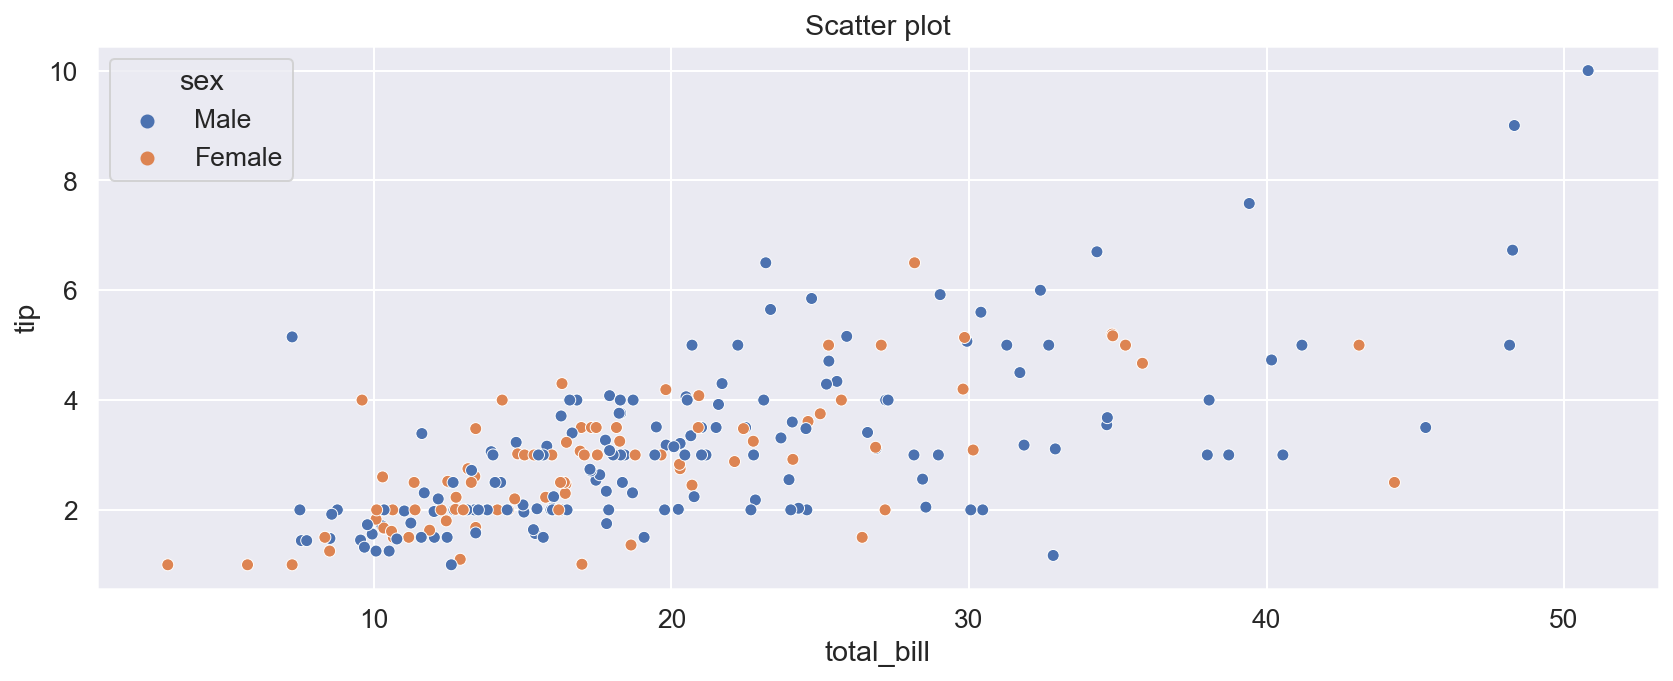

In [3]:
sns.set_theme(font_scale=1.2) # set theme for plots

plt.figure(figsize=(14, 5))
sns.scatterplot(data=tips, 
                x="total_bill", 
                y="tip", 
                hue="sex"
               )

plt.title("Scatter plot")
plt.show()

## Line plot

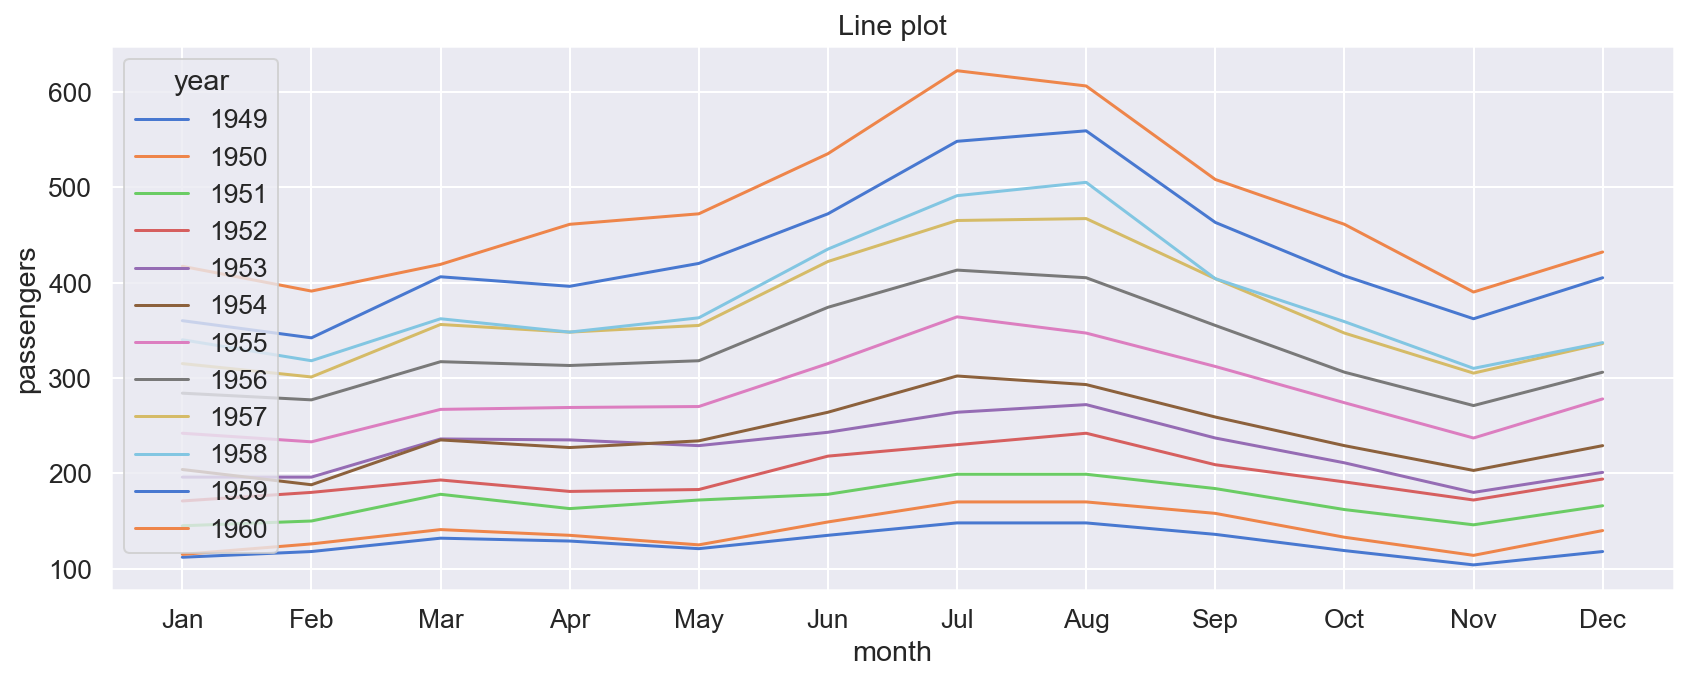

In [4]:
plt.figure(figsize=(14, 5))

sns.lineplot(data = flights, 
             x="month", 
             y="passengers", 
             hue = "year",
             palette = "muted"
             )

plt.title("Line plot")
plt.show()

## Bar plot

By default values in a column with categorical data are plotted in the order they are encountered in the DataFrame. In the example below it means that the order of days on the x-axis would not necessarily correspond to the usual ordering of days in a week. We can override this by assigning a list of values of the x-column to the `order` argument. Bars will be plotted according to the ordering of the list. 

In [16]:
# DataFrame with total tip amounts for a given day and sex 
t = tips.groupby(["day", "sex"])["tip"].sum().reset_index()
t.head()

,day,sex,tip
0,Thur,Male,89.41
1,Thur,Female,82.42
2,Fri,Male,26.93
3,Fri,Female,25.03
4,Sat,Male,181.95


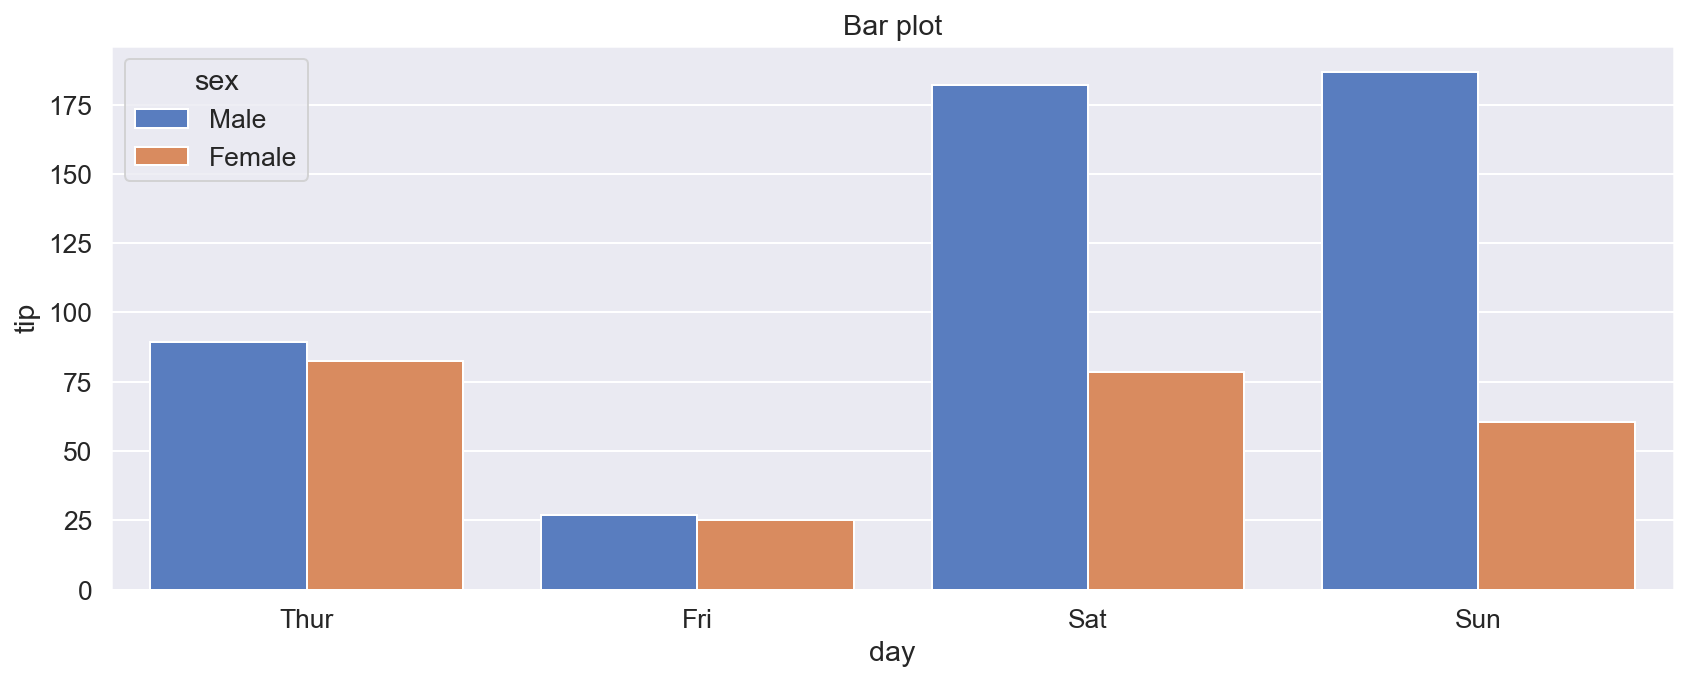

In [17]:
plt.figure(figsize=(14, 5))
sns.barplot(data=t, 
            x="day", 
            y="tip", 
            hue="sex", 
            order = [ "Thur", "Fri", "Sat", "Sun"],
            palette = "muted"
           )

plt.title("Bar plot")
plt.show()

## Strip plot

In a strip plot values in each category are plotted along the y-axis. Plotted points have their x-coordinates randomized a bit, to decrease overlapping. 

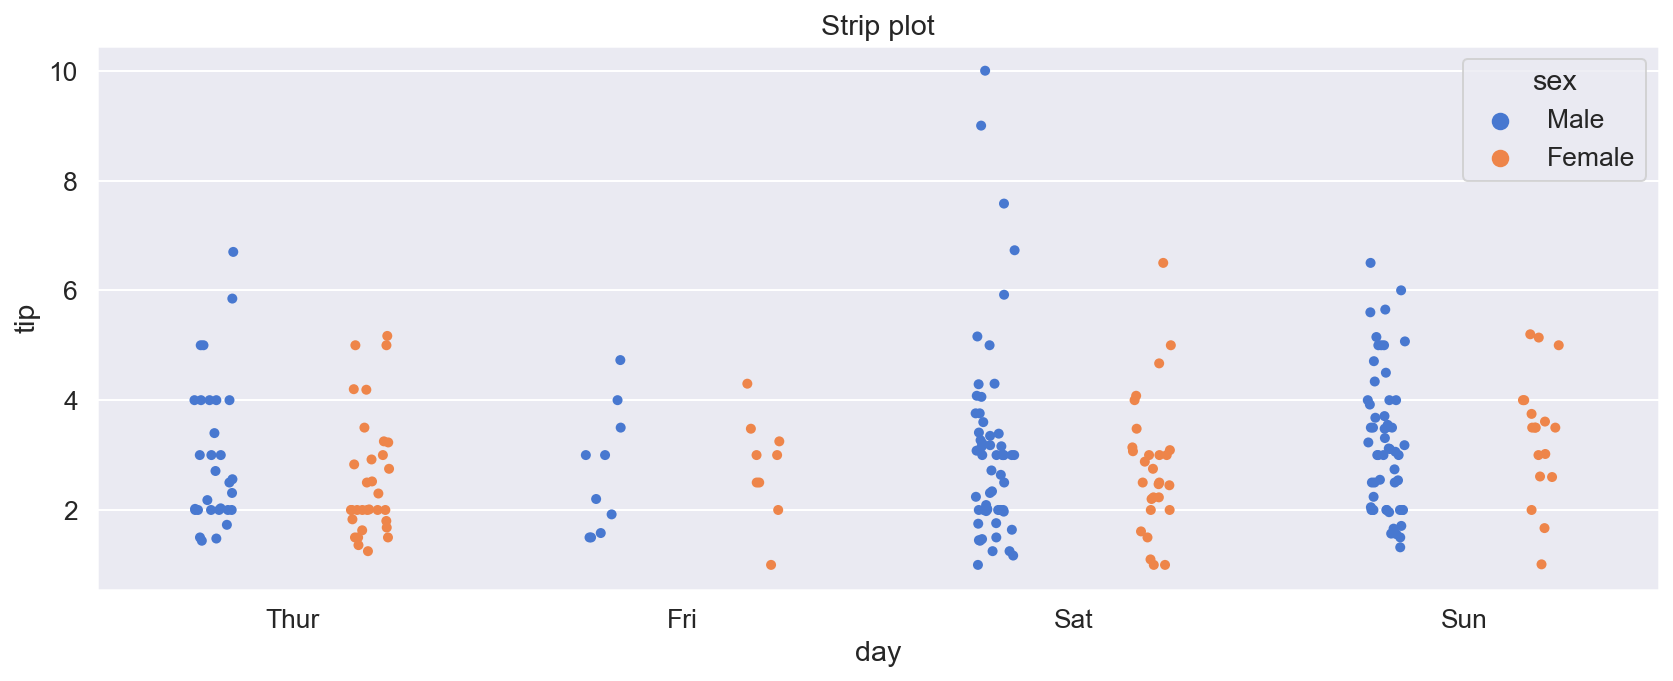

In [6]:
plt.figure(figsize=(14, 5))
sns.stripplot(data=tips, 
              x="day", 
              y="tip", 
              hue="sex",
              dodge=True,    # separate strips of points of different colors
              order = [ "Thur", "Fri", "Sat", "Sun"],
              palette = "muted"
             )

plt.title("Strip plot")
plt.show()

## Swarm plot

Swarm plot is similar to the strip plot, but x-coordinates of points are adjusted so that the points do not overlap. 

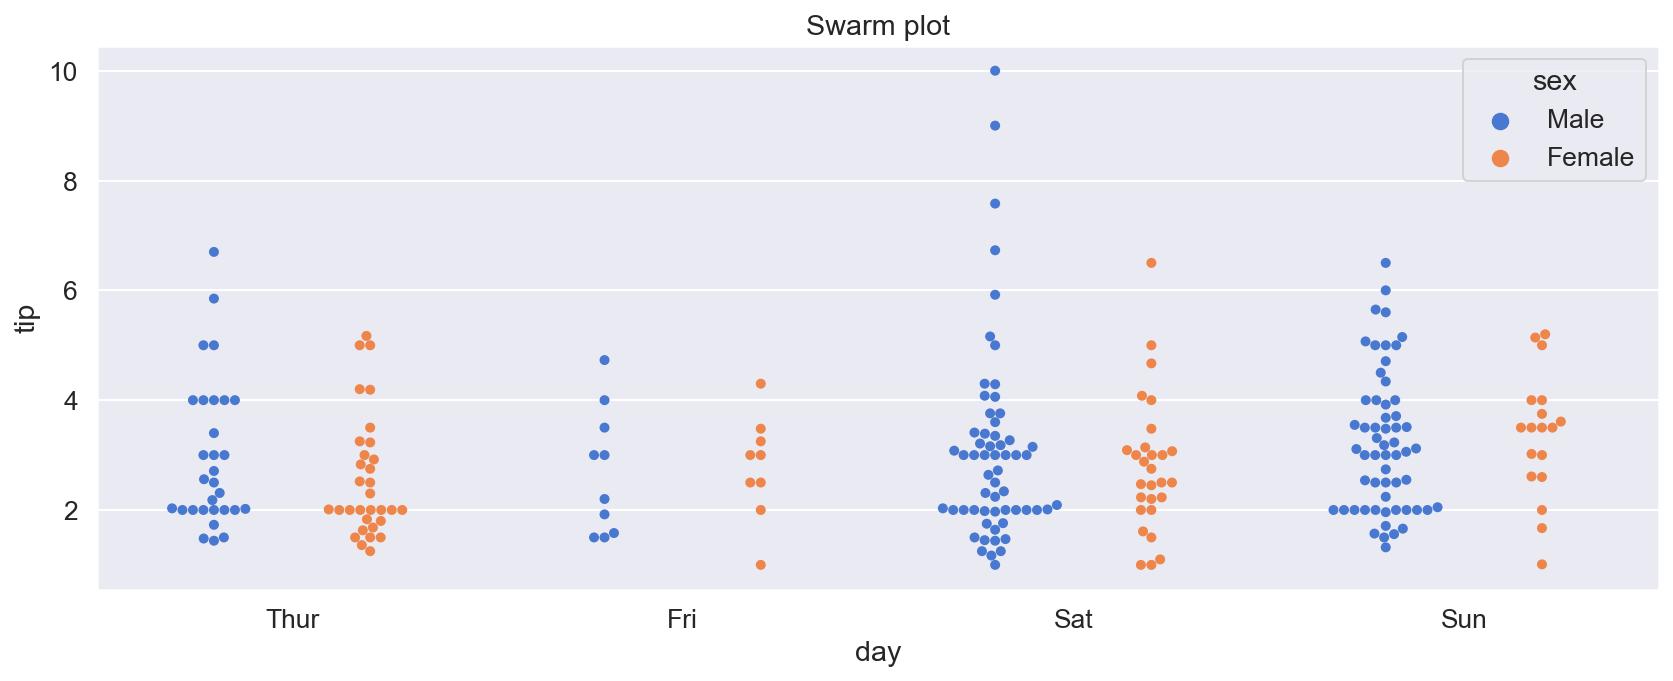

In [7]:
plt.figure(figsize=(14, 5))
sns.swarmplot(data=tips, 
              x="day", 
              y="tip", 
              hue="sex",
              dodge=True,    # separate strips of points of different colors
              order = [ "Thur", "Fri", "Sat", "Sun"],
              palette = "muted"
             )

plt.title("Swarm plot")
plt.show()

## Box plot

Components of a box plot:

- The lower edge of a box marks the *first quartile*: 25% of data values are below it. 
- The line inside a box marks the *median*: 50% of data values are below, and 50% is above it. 
- The upper edge of a box marks the *third quartile*: 75% of data values are below it. 
- The height of the box (i.e. the difference between the first and third quartiles) is called the *Interquartile Range* (IRQ). 
- The length of whiskers can be controlled by the `whis` argument. The whiskers of a box extend to the smallest and larges data values which are within `whis` $\times$ IQR from the lower and upper edges of a box.
- Data values which are outside the range of whiskers are considered to be  *outliers*. They are plotted as individual points.

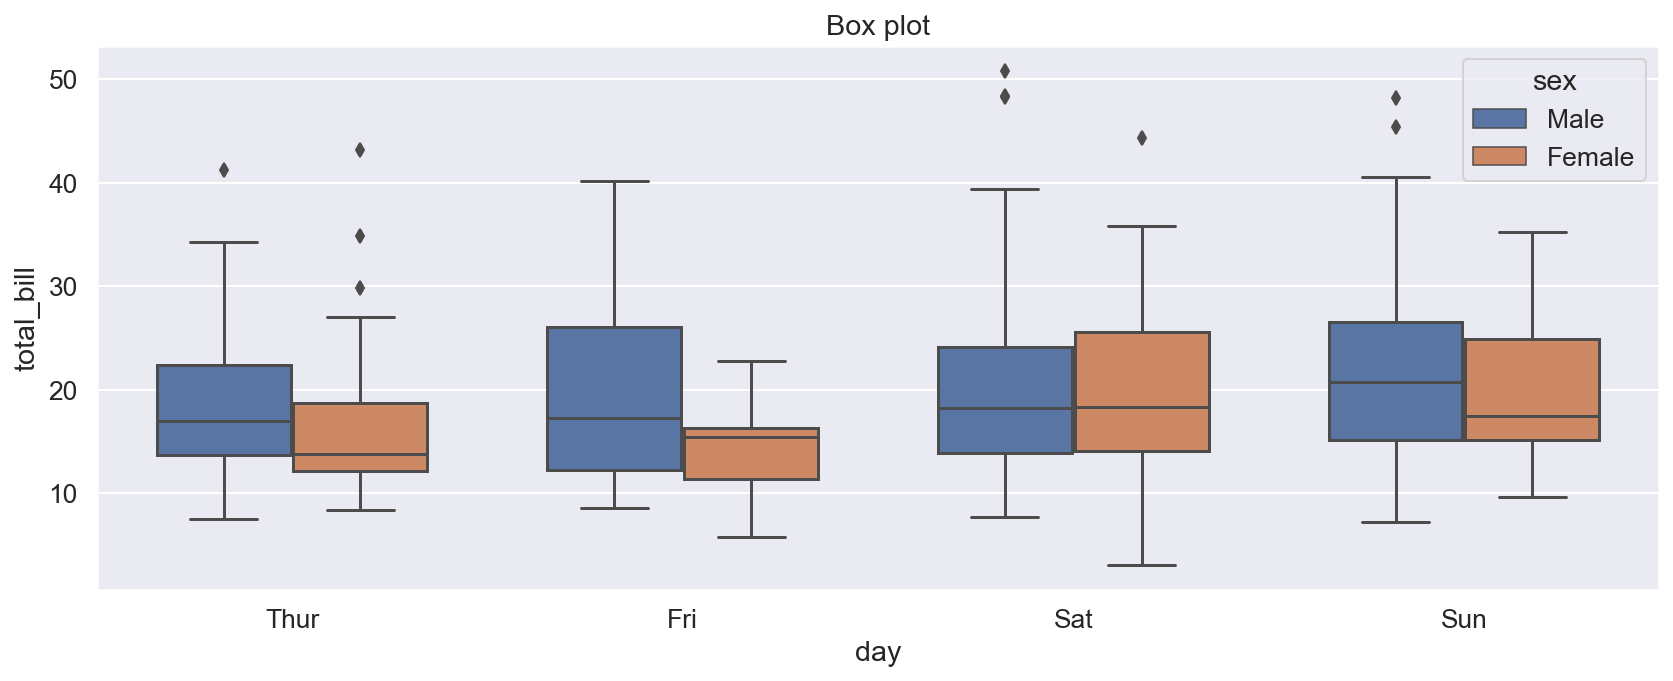

In [8]:
plt.figure(figsize=(14, 5))
sns.boxplot(data=tips, 
            x="day", 
            y="total_bill", 
            hue="sex",
            dodge=True,   # separate boxes of different colors
            width=0.7,    # width of boxes
            whis=1.5,     # controls the length of whiskers of a box
            order = [ "Thur", "Fri", "Sat", "Sun"],
            palette = "deep"
       )

plt.title("Box plot")
plt.show()

## Violin plot

Violin plots show kernel density estimate (KDE) of data. 

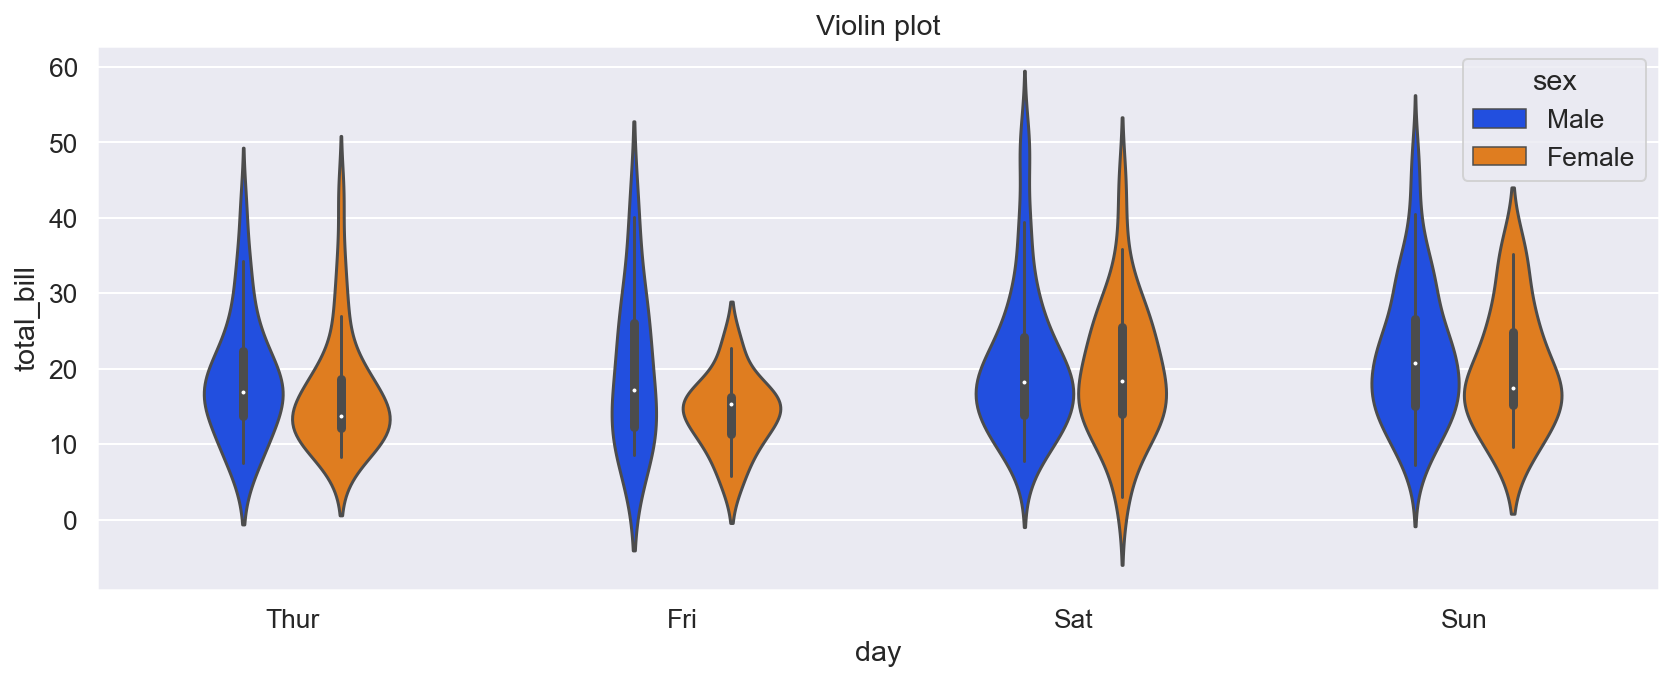

In [20]:
plt.figure(figsize=(14, 5))
sns.violinplot(data=tips, 
            x="day", 
            y="total_bill", 
            hue="sex",
            dodge=True,   # separate plots of different colors
            width=0.5,    # width of plots
            order = [ "Thur", "Fri", "Sat", "Sun"],
            palette = "bright",
       )

plt.title("Violin plot")
plt.show()

## Histogram plot


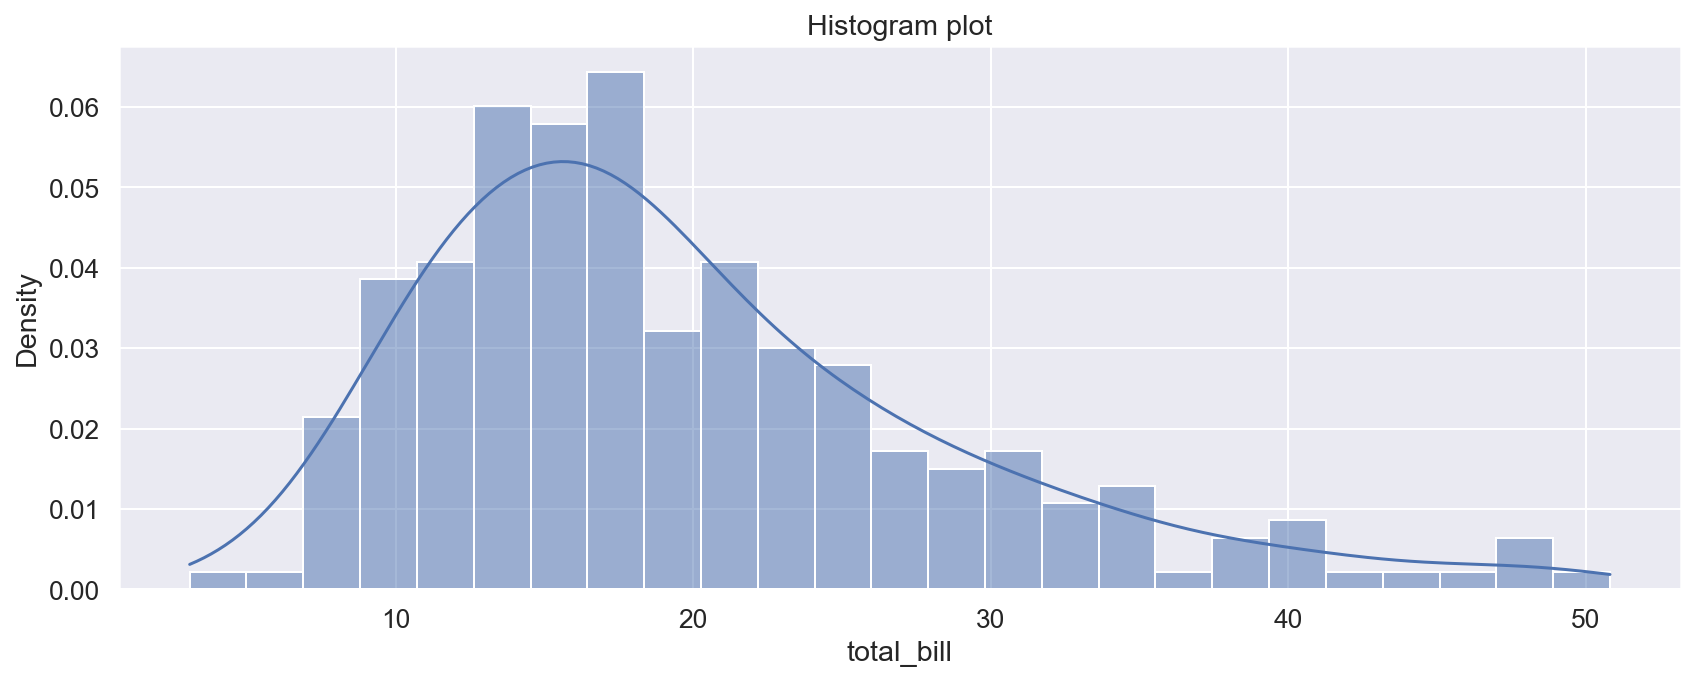

In [10]:
plt.figure(figsize=(14, 5))
sns.histplot(data=tips, 
             x="total_bill",
             stat="density",    # normalize the histogram so that the total area of bars is 1
             kde=True,          # plot kernel density estimate
             bins=25            # number of bins of the histogram
            )

plt.title("Histogram plot")
plt.show()

## Joint plot

The function `sns.jointplot()` produces a plot of data points together with marginal subplots.  Below we use it to add histograms on the margins of the x-axis and y-axis of a scatter plot. While all previous examples used axes-level functions, `sns.jointplot()` is a figure-level function, i.e. it builds the whole matplolib figure.

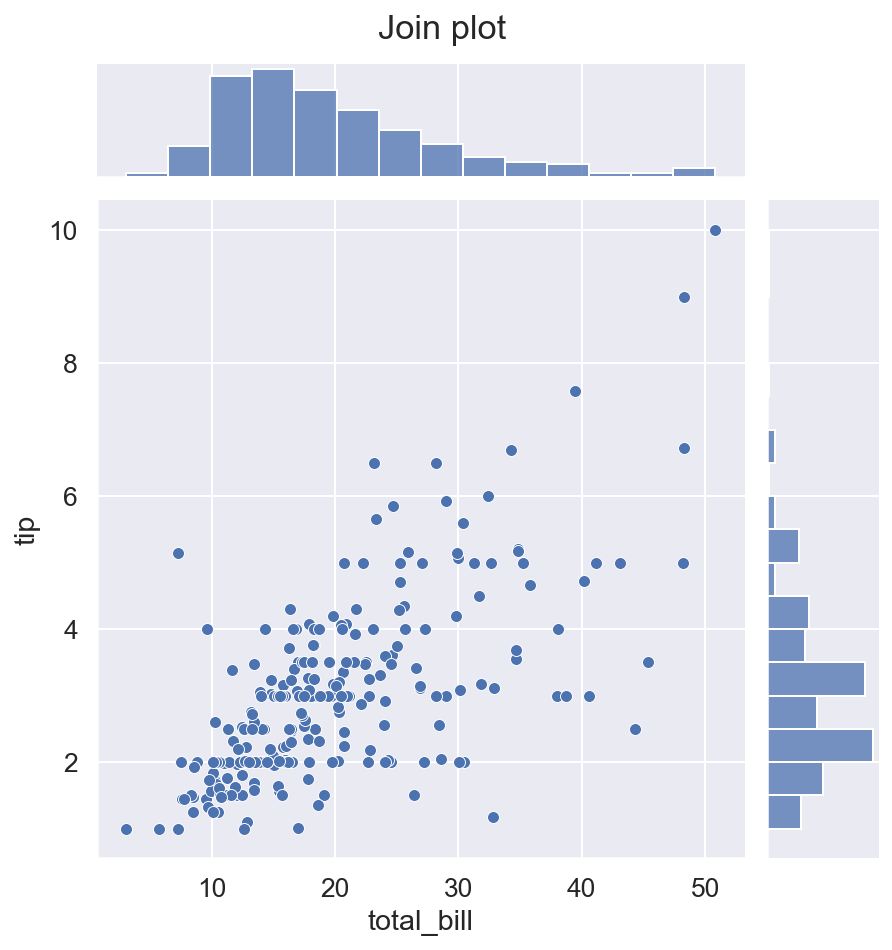

In [11]:
sns.jointplot(data=tips,
              x="total_bill",
              y="tip",
              kind="scatter",   # plot kind
              height=6.5,         # plot height
             )

plt.suptitle("Join plot", y=1.02)   # adds title to the plot
plt.show()

## Pair plot

Some types of plots (e.g. the scatter plot or the line plot) show relationships between two variables. The function `sns.pairplot()` is useful if we are dealing with more than two variables. It produces a grid of subplots, one subplot for each pair of variables. Subplots on the diagonal of the grid, which depend only on one variable, can be used to illustrate this single viable using its histogram, KDE etc. The function `sns.pairplot()` is a figure-level function. 

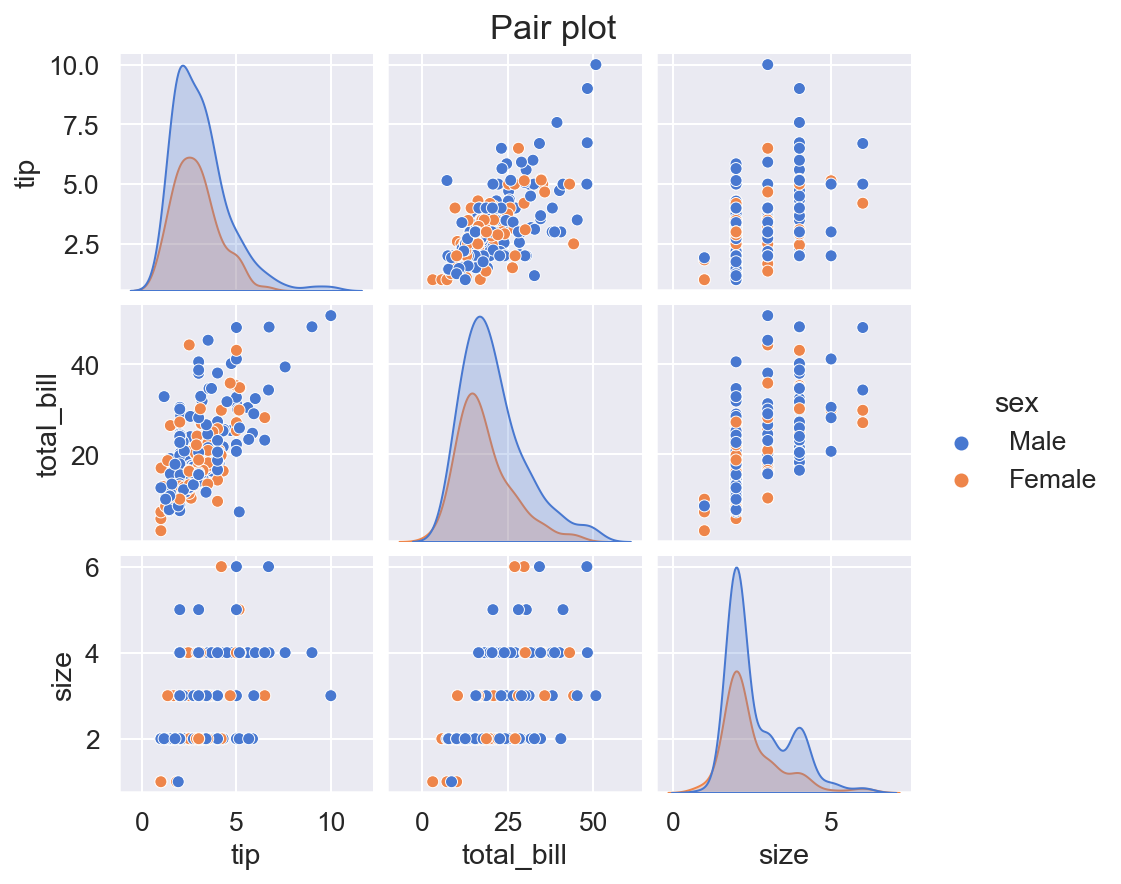

In [21]:
sns.pairplot(data=tips,
             vars = ["tip", "total_bill", "size"],  # names of columns used for the plot
             kind="scatter",                        # kind of plots for each pair of different columns
             diag_kind="kde",                       # kind of plots on the diagonal
             hue="sex",  
             height=2, 
             aspect=1.1,
             palette="muted"
             )

plt.suptitle("Pair plot", y=1.02)   # adds title to the plot
plt.show()